# Student Dropout Classification Project

### Dataset Information

Dataset : The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. 

The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors. 

The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course. 

## Importing Libraries

In [2]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time
import numpy as np
import warnings

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE,SelectFromModel


from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns
from sklearn.inspection import permutation_importance

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

## Loading Dataset

In [3]:
# Importing Dataset using Pandas.
data = pd.read_csv("data.csv", sep = ';')
data.shape  

(4424, 37)

In [4]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Exploratory Data Analysis - EDA

In [5]:
# Counting Number of Target.
dictribution = data["Target"].value_counts()
dictribution

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

So, our dataset has three classes. So this is multi class classification task. Our classes are not balanced as we can see Graduates are more as compare to the other classes. so our data is imbalanced.

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


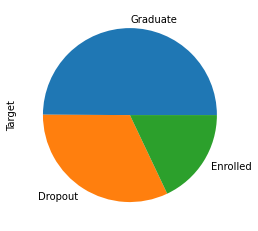

In [6]:
# Let's calculate the percentage of Business category.
data['Target'].value_counts()
func_dict = data["Target"].value_counts()
print(func_dict)

#plot the bar graph of percentage categories
data['Target'].value_counts().plot.pie()
plt.show()

In Piechart, we can observe that around 50% are graduates and remaining are Dropout and Enrolled.

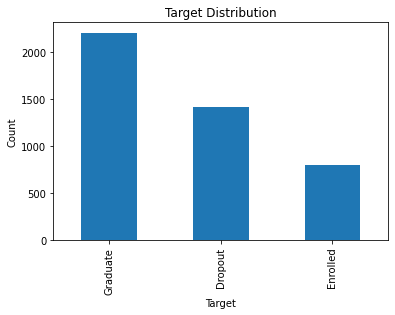

In [7]:
class_counts = data['Target'].value_counts()
class_counts.plot(kind='bar')

plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()

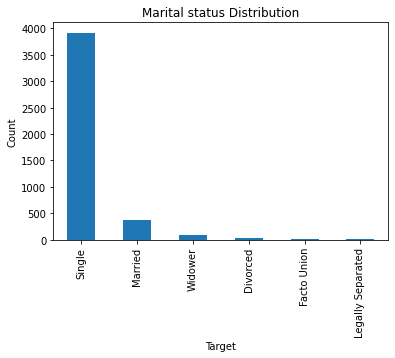

In [64]:
class_counts = data['Marital status'].value_counts()
class_counts.plot(kind='bar')

plt.title('Marital status Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5], ['Single', 'Married','Widower','Divorced','Facto Union','Legally Separated'])

plt.show()

1 – single----- 2 – married----- 3 – widower----- 4 – divorced----- 5 – facto union----- 6 – legally separated

Most of the people in the graphs are single and few of them are married and others.

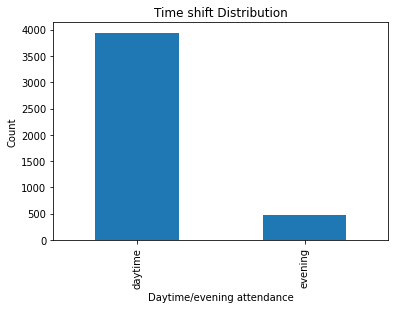

In [53]:
class_counts = data['Daytime/evening attendance	'].value_counts()
class_counts.plot(kind='bar')

plt.title('Time shift Distribution')
plt.xlabel('Daytime/evening attendance')
plt.ylabel('Count')

plt.xticks([0, 1], ['daytime', 'evening'])

plt.show()

	1 – daytime  ------- 0 - evening

Most of the people are in Morning classes students as compare to the evening class.

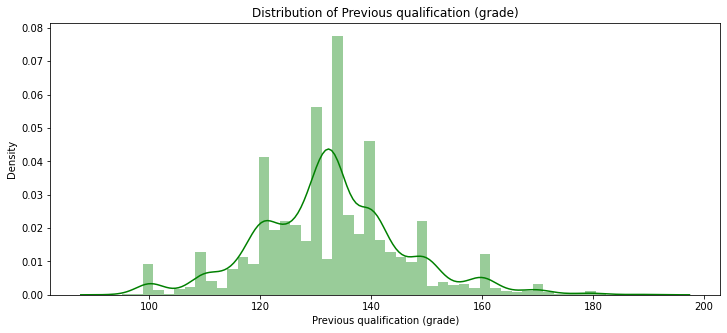

In [10]:
# Previous Qualification Distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of Previous qualification (grade)")
ax = sns.distplot(data["Previous qualification (grade)"], color = 'g')

Average Grade points of student's previous grade are around 135 as can be seen in the distribution below.

Grade of previous qualification (between 0 and 200)

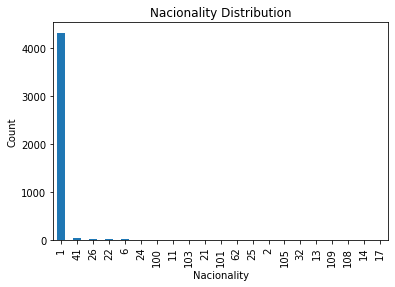

In [68]:
class_counts = data['Nacionality'].value_counts()
class_counts.plot(kind='bar')

plt.title('Nacionality Distribution')
plt.xlabel('Nacionality')
plt.ylabel('Count')
#plt.xticks([1,2,6,11,13,14,17,21,22,24,25,26,32,41,62,100,101,103,105,108,109], ['Portuguese', 'German','Spanish','Italian','Dutch','English','Lithuanian','Angolan','Cape Verdean', 'Guinean','Mozambican','Santomean','Turkish','Brazilian','Romanian','Moldova','Mexican','Ukranian','Russian','Cuban','Colombian'])

plt.show()

1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian

Most of the people in the datatset are portuguese nationals

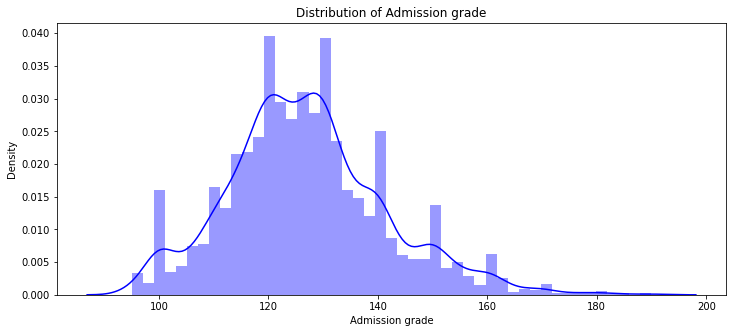

In [12]:
# Admission grade Distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of Admission grade")
ax = sns.distplot(data["Admission grade"], color = 'b')

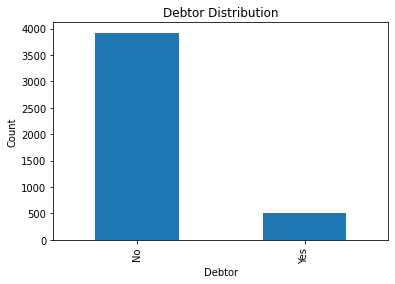

In [54]:
class_counts = data['Debtor'].value_counts()
class_counts.plot(kind='bar')

plt.title('Debtor Distribution')
plt.xlabel('Debtor')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

1 – yes --- 0 – no

Very few students are debtor and most of the students are not having any debt.

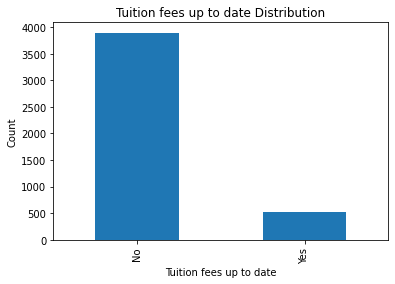

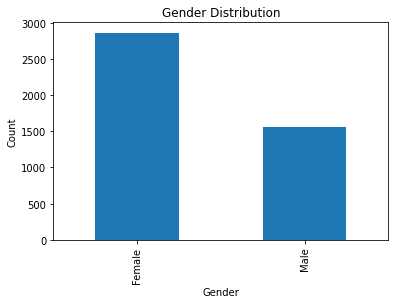

In [55]:
class_counts = data['Tuition fees up to date'].value_counts()
class_counts.plot(kind='bar')

plt.title('Tuition fees up to date Distribution')
plt.xlabel('Tuition fees up to date')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()



class_counts = data['Gender'].value_counts()
class_counts.plot(kind='bar')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])

plt.show()

1 – yes 0 – no     ------------------- 1 – male -----  0 – female

Most of the people are Females in the dataset as compare to the males and most of them are paying thier tuition fee on time.

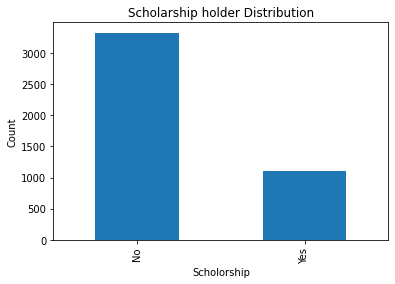

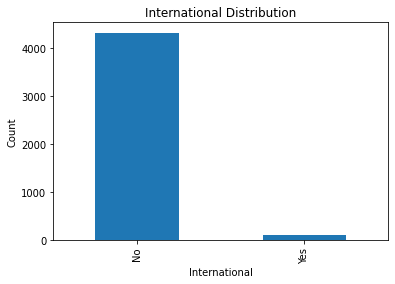

In [56]:
class_counts = data['Scholarship holder'].value_counts()
class_counts.plot(kind='bar')

plt.title('Scholarship holder Distribution')
plt.xlabel('Scholorship')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

class_counts = data['International'].value_counts()
class_counts.plot(kind='bar')

plt.title('International Distribution')
plt.xlabel('International')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

1 – yes 0 – no

Around 1000 students are scholorship holders and most of the students are local.

## Data Preprocessing

In [16]:
# Checking Shape of the dataset.
print('Length of Dataset: ', data.shape[0])
print('Number of Attributes: ', data.shape[1])

Length of Dataset:  4424
Number of Attributes:  37


In [17]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [18]:
# Checking Null values in all features.
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

We dont have any Missing values in this dataset.

In [19]:
# Checking Data Types of every column.
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

All the features are in numerical format, except the target variable.

In [20]:
cols = data.columns  # Listing all column names.
print(cols)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [21]:
num_cols = data._get_numeric_data().columns       # Listing all numerical columns.
print(num_cols)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [22]:
# Listing categorical Column
categorical_colums = list(set(cols) - set(num_cols))
categorical_colums

['Target']

### Label Encoding

Converting Categorical variable into numeircal format.

In [23]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [24]:
data['Target'] = data['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled' :2})
data['Target'] = pd.to_numeric(data['Target'])

In [25]:
data['Target'].unique()

array([0, 1, 2], dtype=int64)

In [26]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

Now all our features are in Numerical format.

In [27]:
# Dropping Unnecessary Column.
data.drop("Mother's qualification",axis=1,inplace=True)
data.drop("Father's qualification",axis=1,inplace=True)
data.drop("Mother's occupation",axis=1,inplace=True)
data.drop("Father's occupation",axis=1,inplace=True)

### Feature Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

scaling.fit(data)
data_scaled = scaling.transform(data)

In [29]:
data_scaled = pd.DataFrame(data_scaled, columns= data.columns)

In [30]:
data_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Admission grade,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.0,0.340000,1.0,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0.0
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.0,0.500000,1.0,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,0.5
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.0,0.313684,1.0,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0.0
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.0,0.258947,1.0,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,0.5
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.0,0.489474,0.0,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,0.5


## Feature Selection using SFS

In [31]:
X = data.loc[:, data.columns != 'Target']
y = data[['Target']]

In [32]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(3096, 32)
(3096, 1)
(1328, 32)
(1328, 1)


In [33]:
rf_w = RandomForestClassifier(random_state=100, n_estimators=50)
rf_w.fit(trainX, trainy)

RandomForestClassifier(n_estimators=50, random_state=100)

<AxesSubplot:xlabel='Features', ylabel='Importances'>

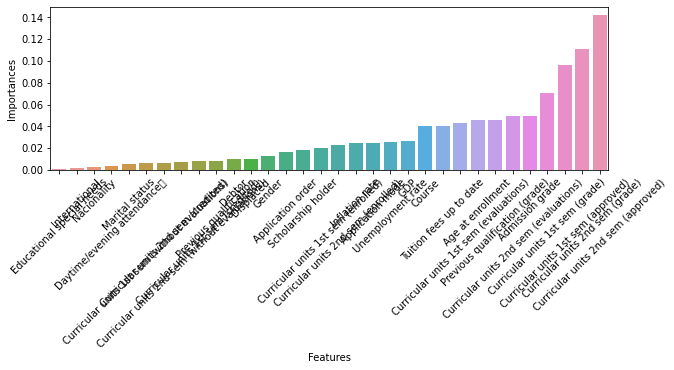

In [34]:
import seaborn as sns
# get the importance of the resulting features.
importances = rf_w.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": trainX.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=final_df)

In [35]:
model_tree = RandomForestClassifier(n_estimators=100,random_state=42)

# use RFE to eleminate the less importance features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=15, step=1)    # Selecting 15 most imporatant Features.
X_train_rfe_tree = sel_rfe_tree.fit_transform(trainX, trainy)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)

[False  True False  True False False  True False  True False False False
  True False False  True False False False  True  True  True False False
  True  True  True  True False False  True  True]
[14  1  4  1 15 10  1 16  1  8 18  7  1  6  5  1 17  9  3  1  1  1 13 12
  1  1  1  1 11  2  1  1]


In [36]:
# These are the important features after RFE.
selected_cols = [column for column in trainX.columns if column in trainX.columns[sel_rfe_tree.get_support()]]
selected_cols

['Application mode',
 'Course',
 'Previous qualification (grade)',
 'Admission grade',
 'Tuition fees up to date',
 'Age at enrollment',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Inflation rate',
 'GDP']

## Applying Machine Learning Models

In [37]:
X = data[['Application mode', 'Course','Previous qualification (grade)','Admission grade','Tuition fees up to date','Age at enrollment','Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)','Inflation rate','GDP']]

y = data[['Target']]

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

# Split the train set into train and validation sets
trainX, valX, trainy, valy = train_test_split(trainX, trainy, test_size=0.2, random_state=2)

print(trainX.shape)
print(trainy.shape)
print(valX.shape)
print(valy.shape)
print(testX.shape)
print(testy.shape)

(2476, 15)
(2476, 1)
(620, 15)
(620, 1)
(1328, 15)
(1328, 1)


In [39]:
features = trainX.columns
print(features)

Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Admission grade', 'Tuition fees up to date', 'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Inflation rate', 'GDP'],
      dtype='object')


### Random Forest Classifier

[0.7983871  0.74596774 0.75       0.78225806 0.78629032 0.73387097
 0.7611336  0.81376518 0.71659919 0.76518219]
Accuracy of Random Forest KFold with k=10: 76.53%


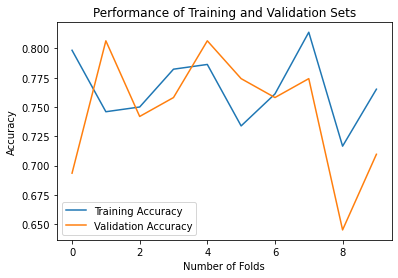

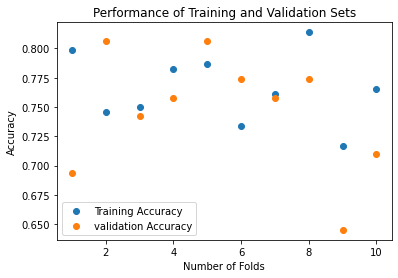

In [40]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
training_results_kfold = cross_val_score(rf, trainX, trainy.values.ravel(), cv=10)
print(training_results_kfold)
print("Accuracy of Random Forest KFold with k=10: %.2f%%" % (training_results_kfold.mean()*100.0))


validation_results_kfold = cross_val_score(rf, valX, valy.values.ravel(), cv=10)


plt.plot(training_results_kfold, label='Training Accuracy')
plt.plot(validation_results_kfold, label='Validation Accuracy')
plt.title("Performance of Training and Validation Sets")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


list = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(list, training_results_kfold, label='Training Accuracy')
plt.scatter(list,validation_results_kfold, label='validation Accuracy')
plt.title("Performance of Training and Validation Sets")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
rf = RandomForestClassifier(max_depth=50,n_estimators = 150)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[296  78  44]
 [ 27 626  28]
 [ 50  91  88]]
------------------------------------
Accuracy of Random Forest: 76.05421686746988 %
------------------------------------
Specificity: 0.7914438502673797
------------------------------------
Sensitivity: 0.9586523736600306
------------------------------------
Miss Rate (False Positive Rate): 0.20855614973262032
------------------------------------
Miss Rate (False Negative Rate): 0.04134762633996937
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       418
           1       0.79      0.92      0.85       681
           2       0.55      0.38      0.45       229

    accuracy                           0.76      1328
   macro avg       0.71      0.67      0.68      1328
weighted avg       0.75      0.76      0.75      1328



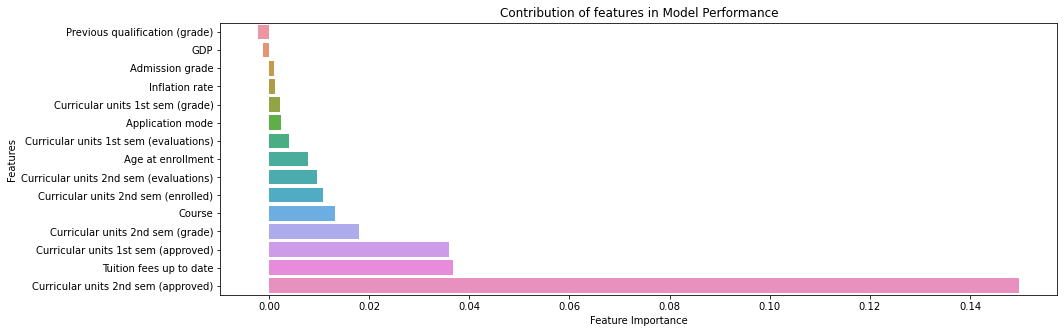

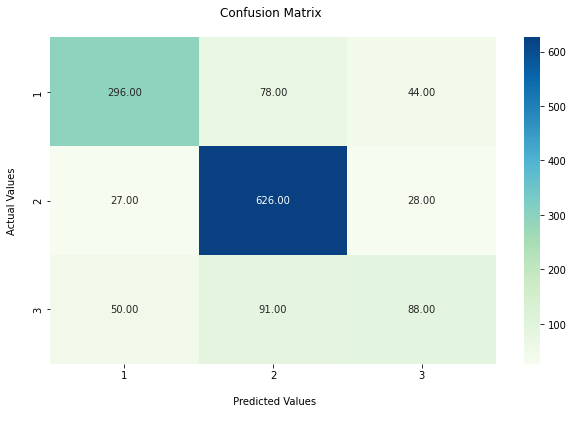

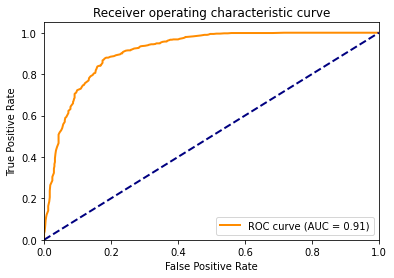

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))


perm_importance = permutation_importance(rf, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")



plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(testy,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['1','2','3'])
fx.yaxis.set_ticklabels(['1','2','3'])
plt.show()



from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for each class
y_pred_prob = rf.predict_proba(testX)

# Compute the micro-average ROC curve and AUC score
fpr, tpr, _ = roc_curve(testy, y_pred_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()


Hyper Parameter Tuning Using Grid Search Optimization

In [43]:
rf_cv = RandomForestClassifier()
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40, 50],
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,700,800,900,1000
    
    ] 
}
grid_search = GridSearchCV(estimator = rf_cv, param_grid=param_grid, cv = 3, verbose = 2)
grid_search.fit(trainX, trainy.values.ravel())
best_grid = grid_search.best_estimator_
print(best_grid)

In [44]:
rf = RandomForestClassifier(max_depth=20,n_estimators = 500)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')

Accuracy of Random Forest: 75.67771084337349 %
------------------------------------


### Logistic Regression Classifier

[0.75403226 0.71774194 0.73387097 0.77822581 0.78225806 0.72177419
 0.72874494 0.78947368 0.67611336 0.76518219]
Accuracy of Logistic Regression KFold with k=10: 74.47%


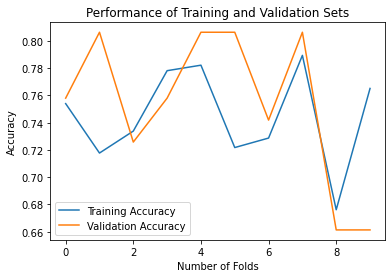

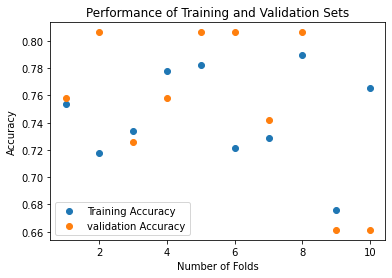

In [45]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

lr = LogisticRegression(solver='liblinear',random_state=2)
training_results_kfold = cross_val_score(lr, trainX, trainy.values.ravel(), cv=10)
print(training_results_kfold)
print("Accuracy of Logistic Regression KFold with k=10: %.2f%%" % (training_results_kfold.mean()*100.0))


validation_results_kfold = cross_val_score(lr, valX, valy.values.ravel(), cv=10)


plt.plot(training_results_kfold, label='Training Accuracy')
plt.plot(validation_results_kfold, label='Validation Accuracy')
plt.title("Performance of Training and Validation Sets")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


list = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(list, training_results_kfold, label='Training Accuracy')
plt.scatter(list,validation_results_kfold, label='validation Accuracy')
plt.title("Performance of Training and Validation Sets")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(trainX,trainy.values.ravel())
y_pred = lr.predict(testX)

Confusion Matrix:
[[307  81  30]
 [ 36 629  16]
 [ 59 121  49]]
------------------------------------
Accuracy of Logistic Regression: 74.17168674698796 %
------------------------------------
Specificity: 0.7912371134020618
------------------------------------
Sensitivity: 0.9458646616541353
------------------------------------
Miss Rate (False Positive Rate): 0.20876288659793815
------------------------------------
Miss Rate (False Negative Rate): 0.05413533834586466
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       418
           1       0.76      0.92      0.83       681
           2       0.52      0.21      0.30       229

    accuracy                           0.74      1328
   macro avg       0.68      0.62      0.63      1328
weighted avg       0.72      0.74      0.71      1328



Text(0.5, 1.0, 'Contribution of features in Model Performance')

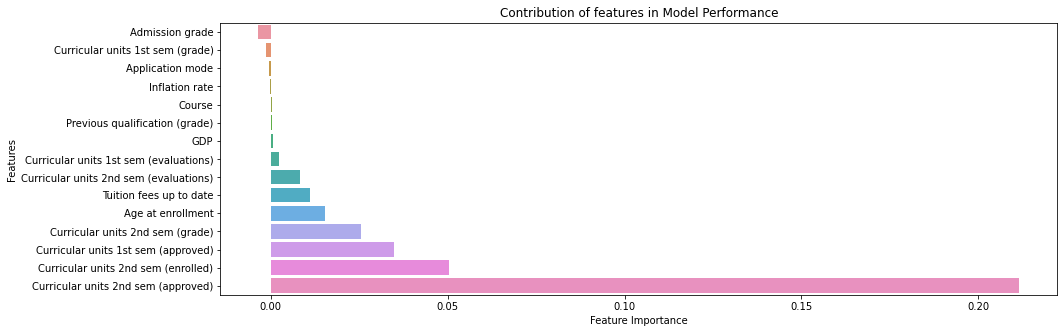

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')


accuracy = lr.score(testX, testy)
print("Accuracy of Logistic Regression:",accuracy*100,"%")
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))


perm_importance = permutation_importance(lr, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

Adding Regularization Term "L2 Penalty" on logistic regression

In [48]:
lr = LogisticRegression(penalty='l2', C=1.0)
lr.fit(trainX,trainy.values.ravel())
y_pred = lr.predict(testX)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')


accuracy = lr.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')

Confusion Matrix:
[[272 133  13]
 [ 51 630   0]
 [ 55 169   5]]
------------------------------------
Accuracy of Random Forest: 68.29819277108435 %
------------------------------------


### Support Vector Machine Classifier

In [50]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

svm = SVC(decision_function_shape='ovr')
training_results_kfold = cross_val_score(svm, trainX, trainy.values.ravel(), cv=10)
print(training_results_kfold)
print("Accuracy of Support Vector Machine KFold with k=10: %.2f%%" % (training_results_kfold.mean()*100.0))


validation_results_kfold = cross_val_score(svm
                                           
                                           
                                           , valX, valy.values.ravel(), cv=10)


plt.plot(training_results_kfold, label='Training Accuracy')
plt.plot(validation_results_kfold, label='Validation Accuracy')
plt.title("Performance of Training and Validation Sets")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy")
plt.legend()
plt.show()




list = [1,2,3,4,5,6,7,8,9,10]
plt.scatter(list, training_results_kfold, label='Training Accuracy')
plt.scatter(list,validation_results_kfold, label='validation Accuracy')
plt.title("Performance of Training and Validation Sets")
plt.xlabel("Number of Folds")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
svm = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svm.fit(trainX,trainy.values.ravel())
y_pred = svm.predict(testX)

Confusion Matrix:
[[296  77  45]
 [ 30 620  31]
 [ 56  97  76]]
------------------------------------
Accuracy of Random Forest: 74.69879518072288 %
------------------------------------
Specificity: 0.7935656836461126
------------------------------------
Sensitivity: 0.9538461538461539
------------------------------------
Miss Rate (False Positive Rate): 0.2064343163538874
------------------------------------
Miss Rate (False Negative Rate): 0.046153846153846156
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       418
           1       0.78      0.91      0.84       681
           2       0.50      0.33      0.40       229

    accuracy                           0.75      1328
   macro avg       0.69      0.65      0.66      1328
weighted avg       0.73      0.75      0.73      1328

-------------------Features Contribution--------------------------------------


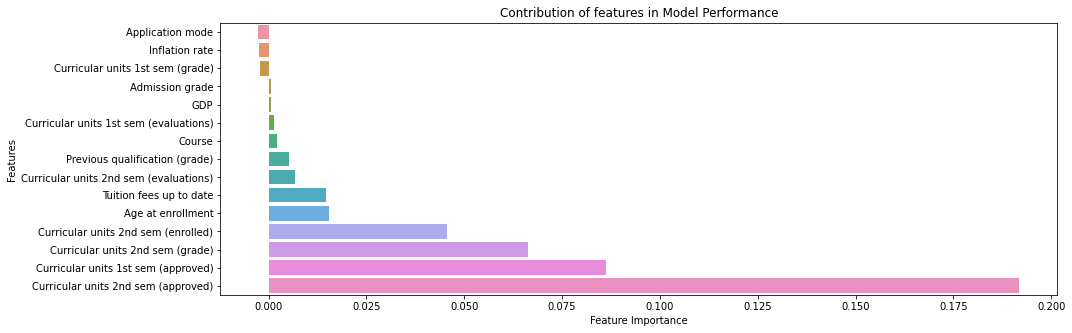

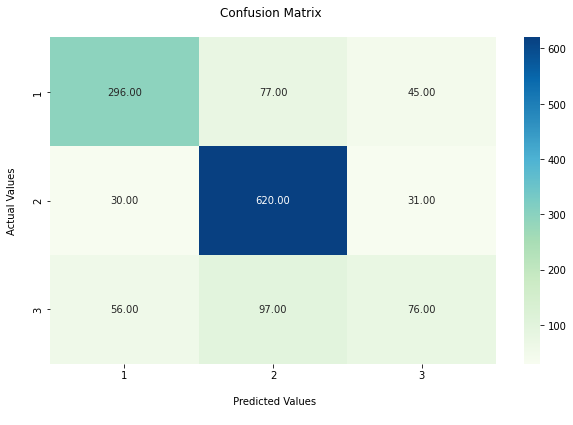

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')


accuracy = svm.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

print('-------------------Features Contribution--------------------------------------')
perm_importance = permutation_importance(svm, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")
plt.figure(figsize=(10,6))




fx=sns.heatmap(confusion_matrix(testy,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['1','2','3'])
fx.yaxis.set_ticklabels(['1','2','3'])
plt.show()


## Conclusion

In conclusion, four alternative models were implemented for our study on applying machine learning to predict student dropout. The random forest model outperformed the other models in terms 
of predicted accuracy and performance measures, according to our thorough experimentation and review. In terms of accuracy, precision, recall, and confusion metrics, random forest outscored 
other models, demonstrating its superior performance and robustness in target prediction. By reducing overfitting and enhancing prediction, and the use of ensemble techniques in random forest, which aggregates decision trees, contributed to its higher performance. According to our research, random forest is a suitable and trustworthy model for predicting student dropout, and it might be successfully applied in real-world settings.

## Limitations

Although the techniques used in this project helped to improve the performance of the models, there are some limitations that should be considered.

- First, the quality of the results depends on the quality of the data. If the data is low in quantity, or biased, the performance of the models may be limited.

- For this project only 5 algorithms were used, there might be other supervised algorithms such as Gradient boosting, Naïve Bayes etc. that can also be used to check if they are performing better or low.

- For future work, we can also perform hyperparameter tuning of the models and then perform machine learning and maybe performance of the models increase after that.

- We can also use ensemble techniques such as voting classifier model to create more robust model.

- Other limitation is, instead of splitting the dataset, a different dataset could be used to evaluate the model performance.